# Assignment 1: Discrete time models
## [Scientific Computing with Python](https://scicompy.yoavram.com/)
## Yoav Ram

In [1]:
import random

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_context('notebook')
colors = sns.color_palette('Set1', 3)
sns.set_palette('Set1')

# General instructions

1. When instructed to implement a function, use the given function names and parameters lists; failure to do so may cause test functions to fail during grading.
1. When instructed to generate a plot, make sure that the plot is clear, that axes are propely labeled, and that the notebook is saved with the plot inline, so that the grader can see the plot without running the code. Make sure that you re-generate the plot if you changed the code!
1. Code lines with a triple comment `###` should not be removed or modified, they are used for automatic grading.
1. Note that there are 3 exercises and the last cell in the notebook says **end of assignment**; if you are missing anything please download the origianl file from the course website.
1. This exercise doesn't put much emphasis on efficieny or runtime. *But*, your code should still run within a reasonable time (a few minutes) and you should use idioms learned in class, e.g. array opreations, wherever possible to "lose your loops".
1. Questions regarding the exercises should be posted to the course forum at the designated group (i.e. "assignment 1"). You can post questions anonymously. You can also visit the Office Hours, but please do not email the course staff with questions about the exercise.
1. Intructions for submitting the exercise are on the [course website](https://scicompy.yoavram.com/assignments).

# Exercise 1

In this exercise we'll model the spread of an infectious disease that spreads through the environment (e.g. air or water) rather than by contact with an infected person.

It would get really overwhelming if you had to ask every person at *every point in time*: "Are you sick yet? Did you get better yet?".
It makes more sense to monitor individuals' states on a *discrete basis* rather than continuously, for example, *once a day*. 

Imagine that there's a 10% *infection rate* and a 20% *recovery rate*.
That implies that *susceptible* people have a 10% chance to transition to the *infected* state, and *infected* people have 20% chance to transition to the *recovered* state between successive timesteps.
100% of those *recovered* will stay *recovered* (i.e. people who are recovered cannot become susceptible or infected again).
In general, we will call the infection rate $\alpha$ and the recovery rate $\beta$.

This is a very simple SIR model, where $S$ stands for *susceptible*, $I$ stands for *infected*, and $R$ stands for *recovered*.

Say that you start with a population of 100 people, and only 1 person is infected (the rest are susceptible).
That means your "initial state" is $S=99, I=1, R=0$, i.e. 99 are susceptible, 1 is infected, and 0 are recovered.

In [2]:
S = 99 ###
I = 1 ###
R = 0 ###

Implement a function called `step(SIR, α, β)` that given the current state `SIR=(S, I, R)` and the parameters $\alpha$ and $\beta$, randomly generates the next state.

Think: how would you implement the random draws?

In [3]:
def step(SIR, α=0.1, β=0.2): ###
    S, I ,R = SIR
    total = sum(SIR)
    _R =  sum(np.random.rand(int(I)) < β)
    _I = I - _R # people who got recovered, is not infected anymore
    _R += R # new recovered
    _I += sum(np.random.rand(int(S)) < α)
    # maybe use #         n[t] = np.random.binomial(N, p)
    _S = total - _R - _I # how many suceptibles we have left
    return [_S,_I, _R]


    

    

step([50, 50, 0]) ### this is a stochastic function so it won't always give the same result

[45, 47, 8]

Now implement a function called `simulation(SIR0, α, β, days)` that given an initial state `SIR0=(S0, I0, R0)`, parameters $\alpha$ and $\beta$, and the number of days $days$ to run the simulation, simulates the dynamics and returns a vector `SIR` in which the value at index `t, j` gives state `j` at day `t` (`j` being 0 for $S$, 1 for $I$, and for $R$). 

Note that you should call `step` from `simulation`.

Think: What is the type of the returned value? How many dimensions does it have?

In [4]:
def simulation(SIR0, α=0.1, β=0.2, days=30): ###
    n = np.empty((days+1,3))
    S, I, R = SIR0
    n[0] = [S,I, R]
    t = 1
    while t < n.shape[0]:
        n[t] = step(n[t-1], α, β)
        t += 1
    return n.T
        
    
    
    


print(simulation([100, 0, 0], 0.1, 0.2, 100)) ###


[[100.  95.  85.  78.  71.  68.  62.  58.  52.  41.  39.  33.  32.  27.
   25.  23.  20.  15.  13.  13.  11.  10.   8.   7.   5.   5.   5.   4.
    4.   4.   4.   3.   3.   3.   3.   2.   2.   2.   2.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   5.  15.  22.  24.  22.  20.  19.  19.  24.  22.  22.  20.  21.
   20.  17.  18.  20.  17.  14.  15.  16.  15.  14.  14.  11.  11.  10.
    6.   5.   4.   4.   4.   3.   2.   2.   2.   1.   1.   2.   2.   1.
    1.   0.   0.   0.   0.   0.   1.   1.   1.   1.   1.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.

Finally, run and plot the dynamics for 90 days, starting with 100 susceptibles, and $\alpha=0.1, \beta=0.2$.

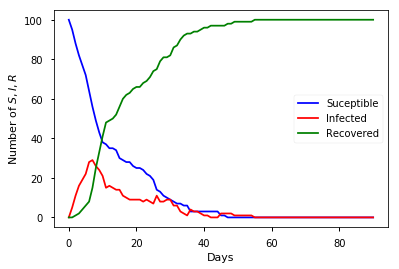

In [5]:

simulation_result = simulation([100, 0, 0], 0.1, 0.2, 90) # using transpose to get a column for each SIR
plt.plot(simulation_result[0], label="Suceptible", color='blue')
plt.plot(simulation_result[1], label="Infected", color='red')
plt.plot(simulation_result[2], label="Recovered", color='green')
plt.xlabel('Days')
plt.ylabel('Number of $S,I,R$')
plt.legend()



# Exercise 2

In this exercise we want to estimate $T_{I}$ the time until at least 50 % of the population has already become infected (and possibly recoved) and $T_{R}$ the time until 50% of the population has recovered.

Re-implementing, when neccessary, the functions `step` and `simulation` so that you can run multiple simulations in one function call; this would require adding a new parameter for the number of replications (`reps`).

Think: what kind of an `assert` statement would be a good test of the modified functions?

Then plot the dynamics of multiple simulations.

In [140]:
def simulation(SIR0,α=0.03, β=0.02, days=20, reps=5):
    n = np.zeros((days+1, 3, reps))
    S, I, R = SIR0
    n[0][0] = S
    n[0][1] = I
    n[0][2] = R
    t = 1
    while t < days+1 :
        _R = [sum(np.random.rand(int(I)) < β) for I in n[t-1][1]]
        _I = [sum(np.random.rand(int(S)) < α) for S in n[t-1][0]]
        n[t][0] = n[t-1][0] - _I # S
        n[t][1] = n[t-1][1] - _R + _I # I
        n[t][2] = n[t-1][2] + _R # R

        t += 1


    return n




Re-create the previous plot but add lines for the average dynamics -- averaging across replications for each type and day.

Use at least 100 replications for this plot.

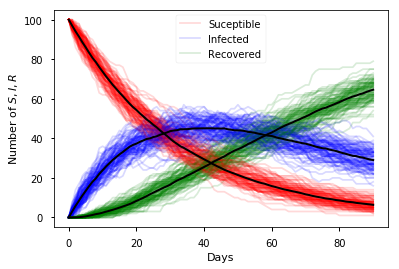

In [141]:
data = simulation((100,0,0),days=90, reps=100)
simulation_result = data.T
data_mean = data.mean(axis=2)
labels = {'s':'Suceptible', 'i': 'Infected', 'r': 'Recovered'}
for res in simulation_result:
    plt.plot(res[0], color='red', alpha=0.15, label=labels['s'])
    plt.plot(res[1], color='blue',alpha=0.15, label=labels['i'])
    plt.plot(res[2], color='green',alpha=0.15, label=labels['r'])
    labels['r'], labels['s'], labels['i'] = '_nolegend_', '_nolegend_', '_nolegend_' # FIXME not very elegant

plt.plot(data_mean, color='black', linewidth=2)


plt.xlabel('Days')
plt.ylabel('Number of $S,I,R$')
plt.legend()


Now print the $T_{I}$ the first day at which at least 50% of the *average* population was already infected and $T_{R}$ the first day at which at least 50% of the *average* population is recovered.

Remember: the calculation should not assume a specific population size (i.e. 100 people).

In [142]:
data = simulation((100,0,0),days=100, reps=100)
simulation_result = data.T
data_mean = data.mean(axis=2)

half_population = sum(data_mean[0]) / 2
mask_i = (data_mean.T[1] + data_mean.T[2] ) > half_population
mask_r = data_mean.T[2]  > half_population

T_I = np.argmax(mask_i) 
T_R = np.argmax(mask_r)

print('T_I = ', T_I) ###
print('T_R = ', T_R) ###

T_I =  23
T_R =  69


Repeast the previous plot (dynamics + average) and add vertical lines for $T_{I}$ and $T_{R}$ (using `plt.axvline`).
Zoom in to the first 30 days and also add a horizontal line at 50% (using `plt.axhline`).

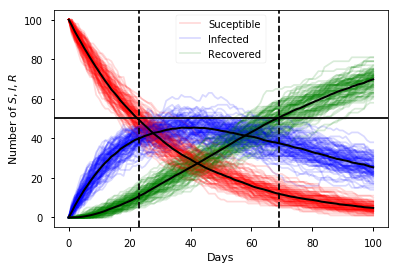

In [143]:
labels = {'s':'Suceptible', 'i': 'Infected', 'r': 'Recovered'}
for res in simulation_result:
    plt.plot(res[0], color='red', alpha=0.15, label=labels['s'])
    plt.plot(res[1], color='blue',alpha=0.15, label=labels['i'])
    plt.plot(res[2], color='green',alpha=0.15, label=labels['r'])
    labels['r'], labels['s'], labels['i'] = '_nolegend_', '_nolegend_', '_nolegend_' # FIXME not very elegant

plt.plot(data_mean, color='black', linewidth=2)


plt.xlabel('Days')
plt.ylabel('Number of $S,I,R$')

plt.axhline(y=len(data)/2, color='black')
plt.axvline(x=T_I, ls='--', color='black')
plt.axvline(x=T_R, ls='--', color='black')
plt.legend()








# Exercise 3

Now we change our focus to a disease that is transmitted by contact.

Therefore, the probability for a susceptible individual to become infected depends on the frequency of infected individuals, $I/N$ where $N=S+I+R$, and the infection rate is therefore $\alpha I/N$ instead of just $\alpha$.
The recovery rate does not change.

Implement `step` and/or `simulation` accordingly to find $T_{I}$ and $T_{R}$ for this disease.

You will also find that the $\alpha$ and $\beta$ parameters we used before do not allow the disease to spread (which is great!); find some parameters that do allow the disease to spread within a reasonable time scale (i.e. $T_R<365$, that is, less than a year).
Because you will use your own $\alpha$ and $\beta$ parameters your results ($T_I$, $T_R$ and plot) will differ from below.

In [147]:
def simulation_contact(SIR0,α=0.1, β=0.2, days=20, reps=5):
    n = np.zeros((days+1, 3, reps))
    S, I, R = SIR0
    N = sum(SIR0)
    n[0][0] = S
    n[0][1] = I
    n[0][2] = R
    t = 1
    while t < days+1 :
        _R = [sum(np.random.rand(int(i)) < β) for i in n[t-1][1]]
        _I = [ sum(np.random.rand(int(s)) < α * ( n[t-1][1][idx]/N ) ) for idx, s in enumerate(n[t-1][0]) ]
        n[t][0] = n[t-1][0] - _I # S
        n[t][1] = n[t-1][1] - _R + _I # I
        n[t][2] = n[t-1][2] + _R # R

        t += 1


    return n










In [156]:
α = 0.05 # please insert a value here
β = 0.01 # please insert a value here
print('α =', α) ###
print('β =', β) ###

α = 0.05
β = 0.01


In [157]:
data = simulation_contact((99,1,0),days=365, reps=100 , α = α, β = β )
simulation_result = data.T
data_mean = data.mean(axis=2)

half_population = sum(data_mean[0]) / 2
mask_i = (data_mean.T[1] + data_mean.T[2] ) > half_population
mask_r = data_mean.T[2]  > half_population

T_I = np.argmax(mask_i) 
T_R = np.argmax(mask_r)


print('T_I = ', T_I) ###
print('T_R = ', T_R) ###

T_I =  148
T_R =  257


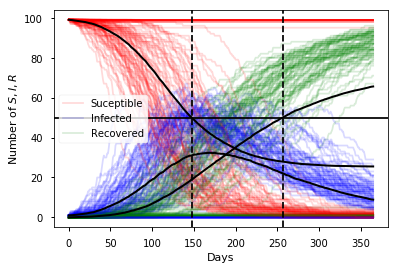

In [158]:
labels = {'s':'Suceptible', 'i': 'Infected', 'r': 'Recovered'}
for res in simulation_result:
    plt.plot(res[0], color='red', alpha=0.15, label=labels['s'])
    plt.plot(res[1], color='blue',alpha=0.15, label=labels['i'])
    plt.plot(res[2], color='green',alpha=0.15, label=labels['r'])
    labels['r'], labels['s'], labels['i'] = '_nolegend_', '_nolegend_', '_nolegend_' # FIXME not very elegant

plt.plot(data_mean, color='black', linewidth=2)


plt.xlabel('Days')
plt.ylabel('Number of $S,I,R$')
plt.legend()

plt.axhline(y=len(simulation_result)/2, color='black')
plt.axvline(x=T_I, ls='--', color='black')
plt.axvline(x=T_R, ls='--', color='black')











**End of assignment**